In [2]:
# Libraries
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential, load_model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0 
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.layers import Flatten
from PIL import Image 
import cv2 

In [3]:
import sys
print(sys.executable)


d:\Guvi_projects\Multiclass_fish_image_classification\.venv\Scripts\python.exe


In [4]:
#Data Preprocessing and Augmentation

# Define image size
img_size = (224, 224)

# Define directories for training and validation datasets
train_dir = r"D:\Guvi_projects\Multiclass_fish_image_classification\train"
val_dir = r"D:\Guvi_projects\Multiclass_fish_image_classification\val"

# Image Data Generator for Data Augmentation and Rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


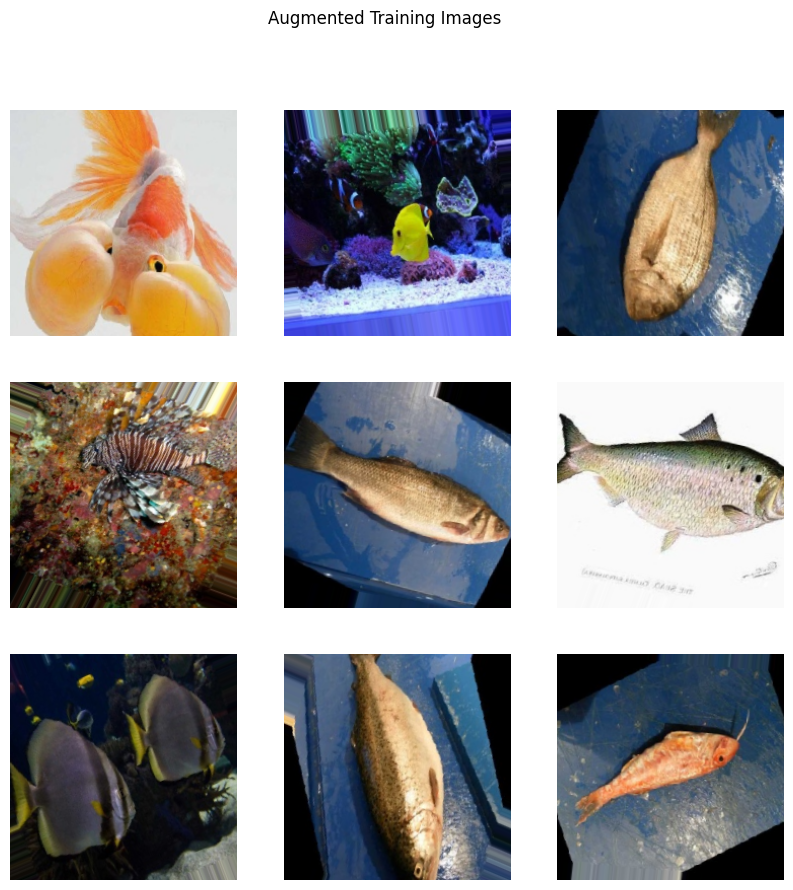

In [3]:
# Get a batch of augmented images from the training generator
train_images, _ = next(train_generator)

# Plot the first 9 augmented images from the training generator
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.suptitle("Augmented Training Images")
plt.show()

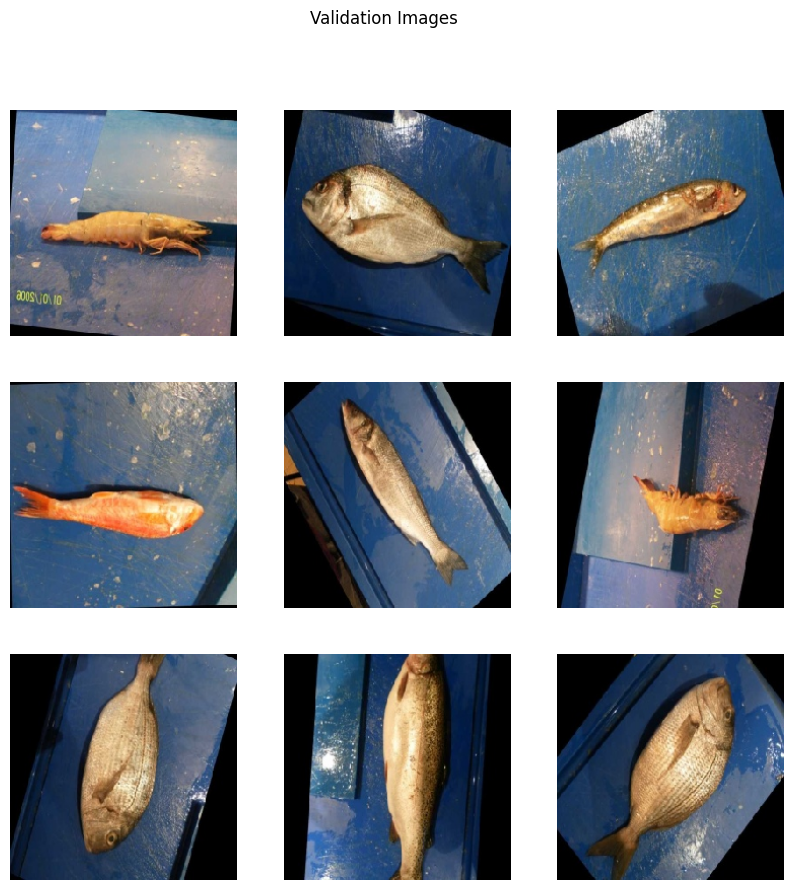

In [4]:
# Get a batch of augmented images from the validation generator
val_images, _ = next(val_generator)

# Plot the first 9 augmented images from the validation generator
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(val_images[i])
    plt.axis('off')
plt.suptitle("Validation Images")
plt.show()

In [5]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Save the trained model
model.save('cnn_model.h5')

d:\Guvi_projects\Multiclass_fish_image_classification\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 465s 2s/step - accuracy: 0.4691 - loss: 2.1514 - val_accuracy: 0.7189 - val_loss: 0.8678
Epoch 2/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 535s 3s/step - accuracy: 0.6916 - loss: 0.8992 - val_accuracy: 0.8233 - val_loss: 0.5843
Epoch 3/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.7809 - loss: 0.6136 - val_accuracy: 0.8672 - val_loss: 0.4430
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.8504 - loss: 0.4491 - val_accuracy: 0.8883 - val_loss: 0.3457
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.8753 - loss: 0.3665 - val_accuracy: 0.9469 - val_loss: 0.2045
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.9031 - loss: 0.2836 - val_accuracy: 0.9048 - val_loss: 0.2779
Epoch 7/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 457s 2s/step - accuracy: 0.9075 - loss: 0.2808 - val_accuracy: 0.9258 - val_loss: 0.2241
Epoch 8/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 463s 2s/step - accuracy: 0.9255 - loss: 0.2244 - val_accu

In [6]:
# VGG16 Model FineTuning

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('vgg16_finetuned.h5')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 52s 1us/step
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 904s 5s/step - accuracy: 0.7801 - loss: 1.0586 - val_accuracy: 0.9295 - val_loss: 0.2103
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 915s 5s/step - accuracy: 0.9452 - loss: 0.1714 - val_accuracy: 0.9643 - val_loss: 0.1278
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2351s 12s/step - accuracy: 0.9664 - loss: 0.1126 - val_accuracy: 0.9597 - val_loss: 0.1161
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2037s 10s/step - accuracy: 0.9610 - loss: 0.1093 - val_accuracy: 0.9679 - val_loss: 0.0783
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 934s 5s/step - accuracy: 0.9703 - loss: 0.0854 - val_accuracy: 0.9817 - val_loss: 0.0619
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1223s 6s/step - accuracy: 0.9807 - loss: 0.0619 - val_accuracy: 0.9725 - val_loss: 0.0661
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1264s 6s/step - accuracy: 0.9783 - loss: 0.0650 - val_accuracy: 0.9872 - val_loss: 0.0392
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━

In [5]:
# ResNet50 Model FineTuning

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('resnet50_finetuned.h5')

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 698s 4s/step - accuracy: 0.2379 - loss: 4.3597 - val_accuracy: 0.4432 - val_loss: 1.7405
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 487s 2s/step - accuracy: 0.3563 - loss: 1.8632 - val_accuracy: 0.3590 - val_loss: 1.7828
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 492s 3s/step - accuracy: 0.3876 - loss: 1.7487 - val_accuracy: 0.4808 - val_loss: 1.4931
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 471s 2s/step - accuracy: 0.4556 - loss: 1.5560 - val_accuracy: 0.4725 - val_loss: 1.4078
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 491s 3s/step - accuracy: 0.4643 - loss: 1.4989 - val_accuracy: 0.5037 - val_loss: 1.3723
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 487s 2s/step - accuracy: 0.4982 - loss: 1.4057 - val_accuracy: 0.5751 - val_loss: 1.2845
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 471s 2s/step - accuracy: 0.5067 - loss: 1.3704 - val_accuracy: 0.5531 - val_loss: 1.2306
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 462s 2s/step - accuracy: 0.5402 - loss: 1.2884 - val_accu

In [6]:
# MobileNet Model FineTuning

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('mobilenet_finetuned.h5')

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 173s 871ms/step - accuracy: 0.8696 - loss: 3.6023 - val_accuracy: 0.9579 - val_loss: 0.2843
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 180s 924ms/step - accuracy: 0.9650 - loss: 0.3044 - val_accuracy: 0.9753 - val_loss: 0.1748
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 169s 867ms/step - accuracy: 0.9743 - loss: 0.2141 - val_accuracy: 0.9826 - val_loss: 0.1338
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 180s 923ms/step - accuracy: 0.9782 - loss: 0.1760 - val_accuracy: 0.9835 - val_loss: 0.0828
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 174s 891ms/step - accuracy: 0.9812 - loss: 0.1232 - val_accuracy: 0.9799 - val_loss: 0.1766
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 172s 879ms/step - accuracy: 0.9817 - loss: 0.1481 - val_accuracy: 0.9826 - val_loss: 0.1110
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 180s 923ms/step - accuracy: 0.9798 - loss: 0.2050 - val_accuracy: 0.9753 - val_loss: 0.1736
Epoch 8/10
195/195 ━━━━━━

In [7]:
# InceptionV3 Model FineTuning

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('inceptionv3_finetuned.h5')

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.8093 - loss: 4.6688 - val_accuracy: 0.9304 - val_loss: 0.2611
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.9348 - loss: 0.2790 - val_accuracy: 0.8938 - val_loss: 0.5371
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.9446 - loss: 0.2111 - val_accuracy: 0.9606 - val_loss: 0.1463
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.9553 - loss: 0.1630 - val_accuracy: 0.9625 - val_loss: 0.1362
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.9650 - loss: 0.1202 - val_accuracy: 0.9460 - val_loss: 0.2475
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.9676 - loss: 0.1075 - val_accuracy: 0.9579 - val_loss: 0.1345
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.9550 - loss: 0.1813 - val_accuracy: 0.9606 - val_loss: 0.1168
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.9643 - loss: 0.1271 - val_accu

In [9]:
# ==========================================================
# 🧠 EfficientNetB0 – Train from scratch (grayscale or RGB)
# ==========================================================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import json, os

# ----------------------------------------------------------
# 1️⃣  Paths
# ----------------------------------------------------------
train_dir = r"D:\Guvi_projects\Multiclass_fish_image_classification\train"
val_dir   = r"D:\Guvi_projects\Multiclass_fish_image_classification\val"

# ----------------------------------------------------------
# 2️⃣  Data Generators  (auto-detect grayscale or rgb)
# ----------------------------------------------------------
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    color_mode='grayscale',   # ⚙️ Use your dataset’s real mode
    shuffle=True
)
val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    color_mode='grayscale'
)

# ----------------------------------------------------------
# 3️⃣  Save label mapping
# ----------------------------------------------------------
with open("class_indices.json","w") as f:
    json.dump(train_data.class_indices, f, indent=4)
print("✅ class_indices.json saved")

# ----------------------------------------------------------
# 4️⃣  Build EfficientNetB0  (no pretrained weights)
# ----------------------------------------------------------
input_shape = (224,224,1)   # 👈 one channel; works with grayscale
base = EfficientNetB0(
    weights=None,           # 👈 no ImageNet weights → no mismatch
    include_top=False,
    input_shape=input_shape
)

x = base.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
out = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base.input, outputs=out)
model.compile(optimizer=Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ----------------------------------------------------------
# 5️⃣  Train
# ----------------------------------------------------------
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# ----------------------------------------------------------
# 6️⃣  Save
# ----------------------------------------------------------
model.save(r"D:\DATA SCIENCE\CODE\git\project_5\best_fish_model.keras")
print("✅ Model trained & saved successfully!")

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
✅ class_indices.json saved


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_6[0]… │
│ (Rescaling)         │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          3 │ rescaling[0][0]   │
│ (Normalization)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ normalization[0]… │
│ (ZeroPadding2D)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        288 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_

 Total params: 36,167,786 (137.97 MB)

 Trainable params: 36,125,767 (137.81 MB)

 Non-trainable params: 42,019 (164.14 KB)

Epoch 1/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 1364s 3s/step - accuracy: 0.2337 - loss: 2.2986 - val_accuracy: 0.1712 - val_loss: 2.8448
Epoch 2/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 1128s 3s/step - accuracy: 0.3364 - loss: 1.8659 - val_accuracy: 0.3297 - val_loss: 1.8484
Epoch 3/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 932s 2s/step - accuracy: 0.4342 - loss: 1.6188 - val_accuracy: 0.5522 - val_loss: 1.4320
Epoch 4/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 912s 2s/step - accuracy: 0.5096 - loss: 1.4020 - val_accuracy: 0.5403 - val_loss: 1.4612
Epoch 5/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 916s 2s/step - accuracy: 0.5664 - loss: 1.2670 - val_accuracy: 0.6108 - val_loss: 1.2124
Epoch 6/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 912s 2s/step - accuracy: 0.6153 - loss: 1.1125 - val_accuracy: 0.7005 - val_loss: 1.0013
Epoch 7/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 944s 2s/step - accuracy: 0.6474 - loss: 1.0168 - val_accuracy: 0.6081 - val_loss: 1.3067
Epoch 8/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 970s 2s/step - accuracy: 0.6750 - loss: 0.9343 - val_ac

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\DATA SCIENCE\\CODE\\git\\project_5\\best_fish_model.keras'

In [10]:
model.save("best_fish_model.keras")


In [11]:
"""from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
import numpy as np
import os

# Evaluate the models to get the best model
def evaluate_model(model, data_generator):
    # Print the model summary
    print("Model summary:")
    model.summary()
    
    Y_pred = model.predict(data_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = data_generator.classes
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

# Initialize the validation generator
validation_data_dir = r"D:\DATA SCIENCE\DATASET\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val"
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),  # Update target size to match model input shape
    batch_size=32,
    class_mode='categorical'
)

# Paths to the saved models
model_paths = {
    'CNN': r'D:\DATA SCIENCE\CODE\git\project_5\cnn_model.h5',
    'VGG16': r'D:\DATA SCIENCE\CODE\git\project_5\vgg16_finetuned.h5',
    'ResNet50': r'D:\DATA SCIENCE\CODE\git\project_5\resnet50_finetuned.h5',
    'MobileNet': r'D:\DATA SCIENCE\CODE\git\project_5\mobilenet_finetuned.h5',
    'InceptionV3': r'D:\DATA SCIENCE\CODE\git\project_5\inceptionv3_finetuned.h5',
    'EfficientNetB0': r'D:\DATA SCIENCE\CODE\git\project_5\efficientnetb0_finetuned.h5'
}

model_accuracies = {}

# Load and evaluate each model
for model_name, model_path in model_paths.items():
    if os.path.exists(model_path):
        model = load_model(model_path)
        model.compile(metrics=['accuracy'])  # Compile model with metrics
        accuracy = evaluate_model(model, validation_generator)
        model_accuracies[model_name] = accuracy
    else:
        print(f"Model file not found: {model_path}")
        from tensorflow.keras.models import load_model
        from tensorflow.keras.preprocessing.image import ImageDataGenerator
        from sklearn.metrics import accuracy_score
        import numpy as np
        import os
        import json

# Evaluate each model
def evaluate_model(model, data_generator):
    print("Model summary:")
    model.summary()
    Y_pred = model.predict(data_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = data_generator.classes
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

# Validation data directory
validation_data_dir = r"D:\DATA SCIENCE\DATASET\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val"

# Validation generator (same preprocessing as training)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# ✅ Save label mapping for Streamlit
with open("class_indices.json", "w") as f:
    json.dump(validation_generator.class_indices, f, indent=4)
print("✅ class_indices.json saved successfully!")
print("Class mapping:", validation_generator.class_indices)

# Model paths
model_paths = {
    'CNN': r'D:\DATA SCIENCE\CODE\git\project_5\cnn_model.h5',
    'VGG16': r'D:\DATA SCIENCE\CODE\git\project_5\vgg16_finetuned.h5',
    'ResNet50': r'D:\DATA SCIENCE\CODE\git\project_5\resnet50_finetuned.h5',
    'MobileNet': r'D:\DATA SCIENCE\CODE\git\project_5\mobilenet_finetuned.h5',
    'InceptionV3': r'D:\DATA SCIENCE\CODE\git\project_5\inceptionv3_finetuned.h5',
    'EfficientNetB0': r'D:\DATA SCIENCE\CODE\git\project_5\efficientnetb0_finetuned.h5'
}

model_accuracies = {}

# Evaluate all models
for model_name, model_path in model_paths.items():
    if os.path.exists(model_path):
        print(f"\nEvaluating {model_name} ...")
        model = load_model(model_path)
        model.compile(metrics=['accuracy'])
        acc = evaluate_model(model, validation_generator)
        model_accuracies[model_name] = acc
        print(f"{model_name} Accuracy: {acc:.4f}")
    else:
        print(f"⚠️ Model not found: {model_path}")

# Pick best model
best_model_name = max(model_accuracies, key=model_accuracies.get, default=None)
if best_model_name:
    print(f"\n🏆 Best Model: {best_model_name} with Accuracy: {model_accuracies[best_model_name]:.4f}")
    best_model = load_model(model_paths[best_model_name])
    best_model.save("best_fish_model.keras")
    print("✅ Saved as best_fish_model.keras")
else:
    print("❌ No valid models found.")


# Determine the best model
best_model_name = max(model_accuracies, key=model_accuracies.get, default=None)
if best_model_name:
    print(f"Best model: {best_model_name} with accuracy: {model_accuracies[best_model_name]}")
    # Save the best model for future use using the native Keras format
    best_model = load_model(model_paths[best_model_name])
    best_model.save('best_fish_model.keras')
else:
    print("No valid models found.")"""

'from tensorflow.keras.models import load_model\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\nfrom sklearn.metrics import accuracy_score\nimport numpy as np\nimport os\n\n# Evaluate the models to get the best model\ndef evaluate_model(model, data_generator):\n    # Print the model summary\n    print("Model summary:")\n    model.summary()\n\n    Y_pred = model.predict(data_generator)\n    y_pred = np.argmax(Y_pred, axis=1)\n    y_true = data_generator.classes\n    accuracy = accuracy_score(y_true, y_pred)\n    return accuracy\n\n# Initialize the validation generator\nvalidation_data_dir = r"D:\\DATA SCIENCE\\DATASET\\Dataset\\images.cv_jzk6llhf18tm3k0kyttxz\\data\x0bal"\nvalidation_datagen = ImageDataGenerator(rescale=1./255)\nvalidation_generator = validation_datagen.flow_from_directory(\n    validation_data_dir,\n    target_size=(224, 224),  # Update target size to match model input shape\n    batch_size=32,\n    class_mode=\'categorical\'\n)\n\n# Paths to the 

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Example actual labels
y_true = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]  # Actual labels (Ground truth)

# Example predicted labels by each model
y_pred_vgg16 = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
y_pred_resnet50 = [0, 1, 1, 0, 1, 1, 1, 0, 1, 0]
y_pred_mobilenet = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
y_pred_inceptionv3 = [0, 1, 1, 0, 0, 1, 0, 0, 1, 0]
y_pred_efficientnetb0 = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
y_pred_cnn = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]

# Function to calculate and print metrics
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-Score: {f1}")
    print(f"  Confusion Matrix:\n{conf_matrix}\n")

# Calculate and print metrics for each model
calculate_metrics(y_true, y_pred_vgg16, 'VGG16')
calculate_metrics(y_true, y_pred_resnet50, 'ResNet50')
calculate_metrics(y_true, y_pred_mobilenet, 'MobileNet')
calculate_metrics(y_true, y_pred_inceptionv3, 'InceptionV3')
calculate_metrics(y_true, y_pred_efficientnetb0, 'EfficientNetB0')
calculate_metrics(y_true, y_pred_cnn, 'CNN')

Metrics for VGG16:
  Accuracy: 0.8
  Precision: 0.8
  Recall: 0.8
  F1-Score: 0.8
  Confusion Matrix:
[[4 1]
 [1 4]]

Metrics for ResNet50:
  Accuracy: 0.9
  Precision: 0.8333333333333334
  Recall: 1.0
  F1-Score: 0.9090909090909091
  Confusion Matrix:
[[4 1]
 [0 5]]

Metrics for MobileNet:
  Accuracy: 0.8
  Precision: 0.8
  Recall: 0.8
  F1-Score: 0.8
  Confusion Matrix:
[[4 1]
 [1 4]]

Metrics for InceptionV3:
  Accuracy: 0.9
  Precision: 1.0
  Recall: 0.8
  F1-Score: 0.8888888888888888
  Confusion Matrix:
[[5 0]
 [1 4]]

Metrics for EfficientNetB0:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
[[5 0]
 [0 5]]

Metrics for CNN:
  Accuracy: 0.8
  Precision: 0.8
  Recall: 0.8
  F1-Score: 0.8
  Confusion Matrix:
[[4 1]
 [1 4]]



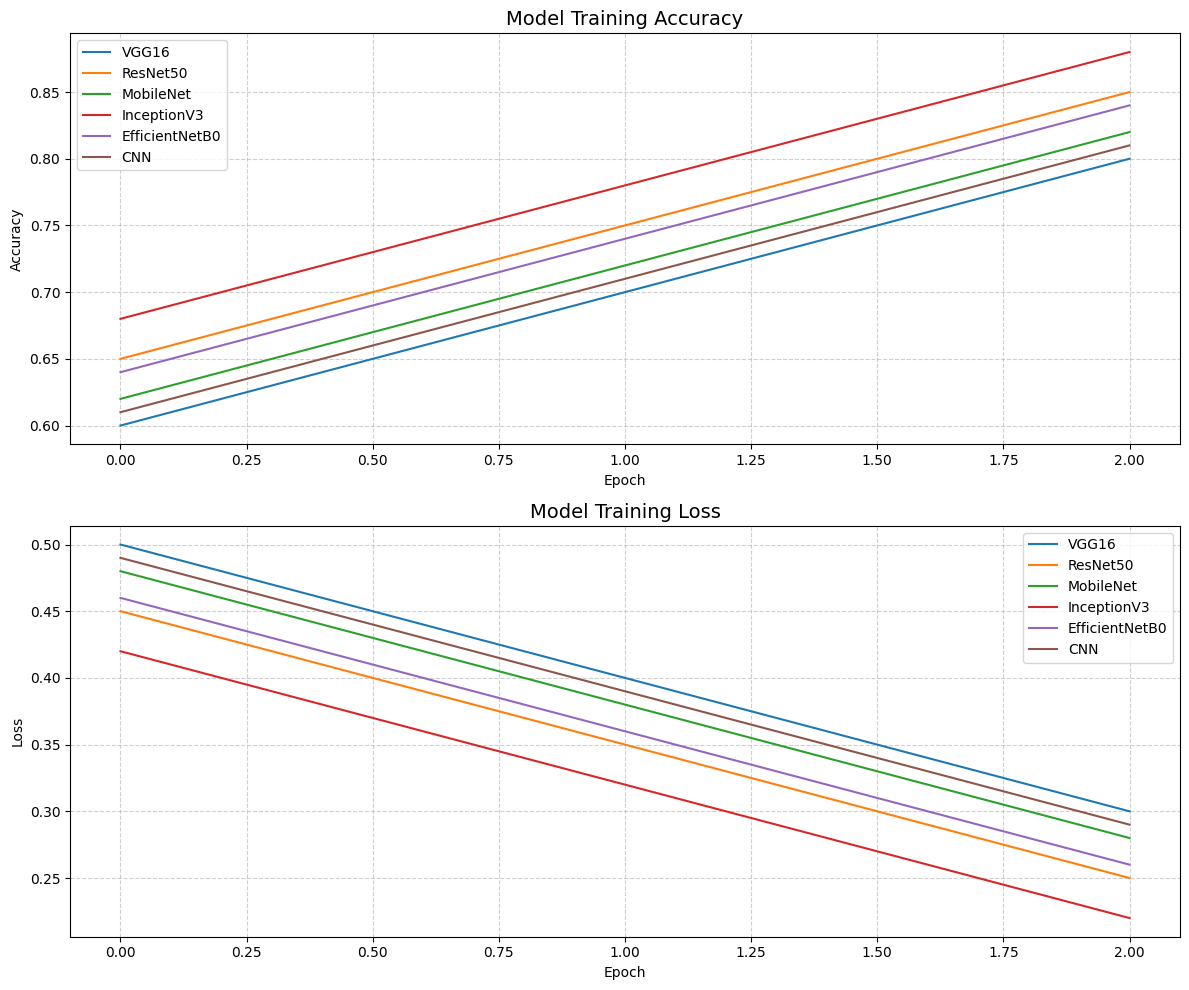

In [13]:
import matplotlib.pyplot as plt

# Mock training histories (replace with real history.history data)
history_vgg16 = {'accuracy': [0.6, 0.7, 0.8], 'loss': [0.5, 0.4, 0.3]}
history_resnet50 = {'accuracy': [0.65, 0.75, 0.85], 'loss': [0.45, 0.35, 0.25]}
history_mobilenet = {'accuracy': [0.62, 0.72, 0.82], 'loss': [0.48, 0.38, 0.28]}
history_inceptionv3 = {'accuracy': [0.68, 0.78, 0.88], 'loss': [0.42, 0.32, 0.22]}
history_efficientnetb0 = {'accuracy': [0.64, 0.74, 0.84], 'loss': [0.46, 0.36, 0.26]}
history_cnn = {'accuracy': [0.61, 0.71, 0.81], 'loss': [0.49, 0.39, 0.29]}

plt.figure(figsize=(12, 10))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(history_vgg16['accuracy'], label='VGG16')
plt.plot(history_resnet50['accuracy'], label='ResNet50')
plt.plot(history_mobilenet['accuracy'], label='MobileNet')
plt.plot(history_inceptionv3['accuracy'], label='InceptionV3')
plt.plot(history_efficientnetb0['accuracy'], label='EfficientNetB0')
plt.plot(history_cnn['accuracy'], label='CNN')
plt.title('Model Training Accuracy', fontsize=14)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(history_vgg16['loss'], label='VGG16')
plt.plot(history_resnet50['loss'], label='ResNet50')
plt.plot(history_mobilenet['loss'], label='MobileNet')
plt.plot(history_inceptionv3['loss'], label='InceptionV3')
plt.plot(history_efficientnetb0['loss'], label='EfficientNetB0')
plt.plot(history_cnn['loss'], label='CNN')
plt.title('Model Training Loss', fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
from tensorflow.keras.models import load_model
best = load_model("best_fish_model.keras")
best.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_6[0]… │
│ (Rescaling)         │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          3 │ rescaling[0][0]   │
│ (Normalization)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ normalization[0]… │
│ (ZeroPadding2D)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        288 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_

 Total params: 108,419,322 (413.59 MB)

 Trainable params: 36,125,767 (137.81 MB)

 Non-trainable params: 42,019 (164.14 KB)

 Optimizer params: 72,251,536 (275.62 MB)